In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Conceito: Saldo em final de período das operações de crédito contratadas no Sistema Financeiro Nacional, 
#classificadas por setor de atividade econômica do tomador. 
#Inclui operações contratadas no segmento de crédito livre e no segmento de crédito direcionado.

In [4]:
dados = pd.read_csv('/content/bcdata.sgs.27749.csv', sep=';')

In [5]:
dados.head()

,data,valor
0,01/01/2012,18900
1,01/02/2012,19060
2,01/03/2012,20471
3,01/04/2012,20897
4,01/05/2012,21013


In [6]:
dados.shape

(126, 2)

In [7]:
dados.tail()

,data,valor
121,01/02/2022,13982
122,01/03/2022,13318
123,01/04/2022,12959
124,01/05/2022,12776
125,01/06/2022,12465


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    126 non-null    object
 1   valor   126 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [11]:
dados['data']= pd.to_datetime(dados['data'])

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    126 non-null    datetime64[ns]
 1   valor   126 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 KB


In [14]:
dados['Mes'] = pd.DatetimeIndex(dados['data']).month

In [15]:
dados['Ano'] = pd.DatetimeIndex(dados['data']).year

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    126 non-null    datetime64[ns]
 1   valor   126 non-null    int64         
 2   Mes     126 non-null    int64         
 3   Ano     126 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.1 KB


In [17]:
dados.head()

,data,valor,Mes,Ano
0,2012-01-01,18900,1,2012
1,2012-01-02,19060,1,2012
2,2012-01-03,20471,1,2012
3,2012-01-04,20897,1,2012
4,2012-01-05,21013,1,2012


In [20]:
dados['Mes'].value_counts()

1    126
Name: Mes, dtype: int64

In [24]:
dados['Ano'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [27]:
dados = dados.set_index('data')

In [28]:
dados

,valor,Mes,Ano
data,,,
2012-01-01,18900,1,2012
2012-01-02,19060,1,2012
2012-01-03,20471,1,2012
2012-01-04,20897,1,2012
2012-01-05,21013,1,2012
...,...,...,...
2022-01-02,13982,1,2022
2022-01-03,13318,1,2022
2022-01-04,12959,1,2022


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


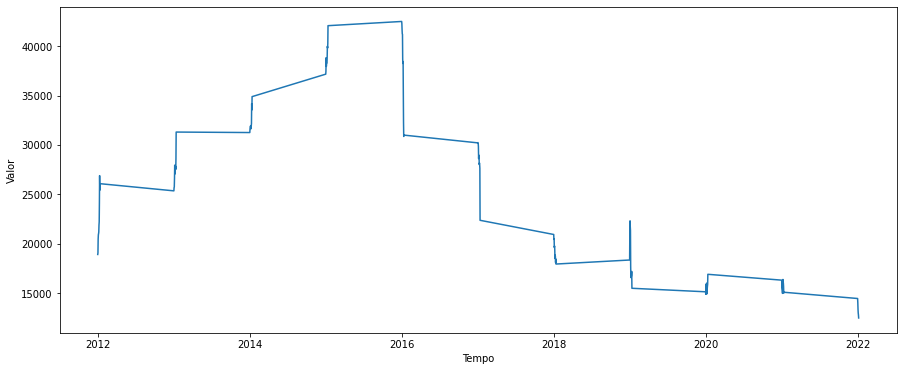

In [35]:
plt.figure(figsize=(15,6))
sns.lineplot(dados.index, dados['valor'])
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


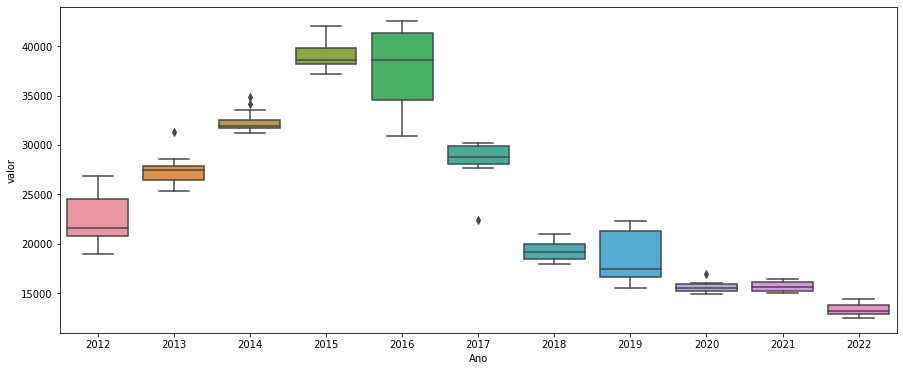

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(dados['Ano'], dados['valor'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


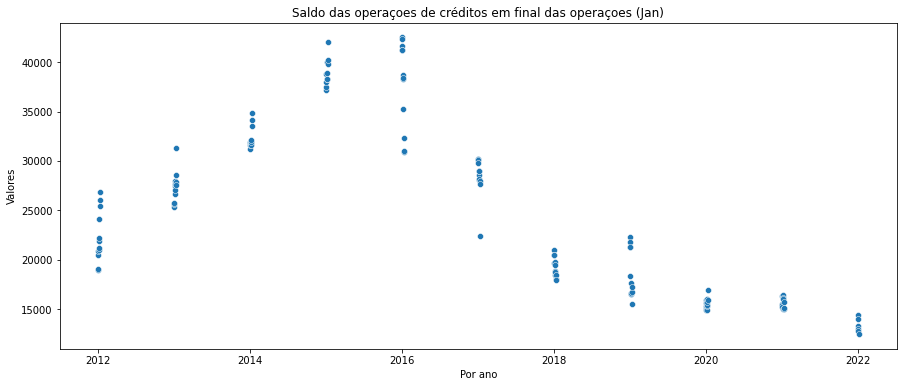

In [43]:
plt.figure(figsize=(15,6))
plt.title('Saldo das operaçoes de créditos em final das operaçoes (Jan)')
sns.scatterplot(dados.index, dados['valor'])
plt.xlabel('Por ano')
plt.ylabel('Valores')
plt.show()

(array([17., 24., 17.,  6.,  9., 16., 13.,  4., 11.,  9.]),
 array([12465. , 15469.4, 18473.8, 21478.2, 24482.6, 27487. , 30491.4,
        33495.8, 36500.2, 39504.6, 42509. ]),
 <a list of 10 Patch objects>)

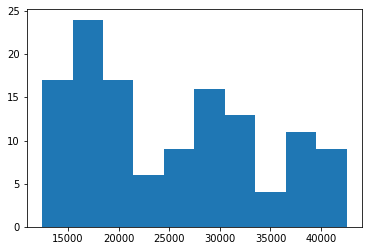

In [47]:
plt.hist(dados['valor'])

(array([12., 13., 13., 13., 11., 13., 13., 13., 12., 13.]),
 array([734503. , 734868.8, 735234.6, 735600.4, 735966.2, 736332. ,
        736697.8, 737063.6, 737429.4, 737795.2, 738161. ]),
 <a list of 10 Patch objects>)

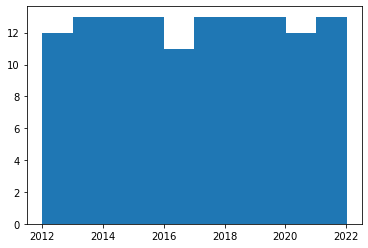

In [50]:
plt.hist(dados.index)

In [51]:
#nesse caso, nao tinha muitas modificaçoes para fazer: ajustou-se apenas o tipo da data, que constava como object e foi transformada para datetime "pd.to_datetime"
#foi usado "pd.DatetimeIndex" para retirar o mes e anos dessa mesma data
#foi usado o ".set_index" para transformar a coluna data em indice.